# Model 1

## Model specification

Model 1 is similar to Model 0a, in that it learns about both presented cues from the feedback to choosing one of them. However, it also improves upon Model0 by looking at hierarchical effects of Age and Delay condition.

## Priors

We model the priors as follows:
$$
\alpha \sim \text{Be}(1, 1) \\
\beta \sim \text{Ga}(1, 0.2)
$$

## Ready the data...

In [1]:
from __future__ import division
import numpy as np
import pandas as pd
import pystan
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
df = pd.read_csv("data/test_data.csv")

In [3]:
df.head()

,SubjNum,AgeGroup,TrialNum,RunNum,DelayCond,Outcome,Chosen,Unchosen,Trial
0,1,1,1,1,2,1.0,4.0,8,1
1,1,1,2,1,2,1.0,4.0,8,2
2,1,1,3,1,2,1.0,4.0,8,3
3,1,1,4,1,1,NaN,NaN,1,4
4,1,1,5,1,2,1.0,4.0,8,5


Stan requires a dictionary of data, so let's make one

In [4]:
ddict = {}
ddict['N'] = df.shape[0]
ddict['Nsub'] = len(df['SubjNum'].unique())
ddict['Ncue'] = sum(~np.isnan(df['Chosen'].unique()))
ddict['Ntrial'] = np.max(df['Trial'])
ddict['Ngroup'] = len(df['AgeGroup'].unique())
ddict['sub'] = df['SubjNum']
ddict['chosen'] = df['Chosen'].fillna(0).astype('int')
ddict['unchosen'] = df['Unchosen'].fillna(0).astype('int')
ddict['trial'] = df['Trial']
ddict['outcome'] = df['Outcome'].fillna(-1).astype('int')
ddict['group'] = df[['AgeGroup', 'SubjNum']].drop_duplicates()['AgeGroup']

In [5]:
np.random.seed(77752)

In [6]:
sm = pystan.StanModel(file='model1.stan')

In [7]:
def initfun():
    return {'beta': np.ones((ddict['Nsub'],)), 
            'alpha': np.random.rand(ddict['Nsub']),
            'a': np.ones((ddict['Ngroup'],)),
            'b': np.ones((ddict['Ngroup'],))}

In [8]:
fit = sm.sampling(data=ddict, chains=2, init=initfun)

/Users/jmxp/anaconda/lib/python3.5/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/Users/jmxp/anaconda/lib/python3.5/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [9]:
samples = fit.extract()

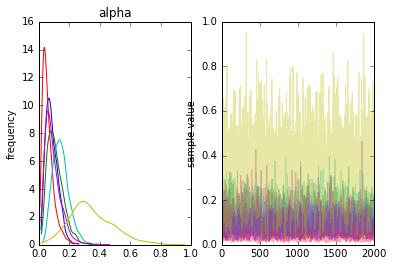

In [10]:
fit.plot('alpha');

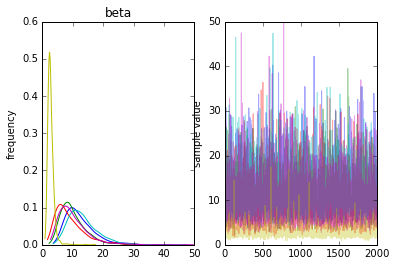

In [11]:
fit.plot('beta');

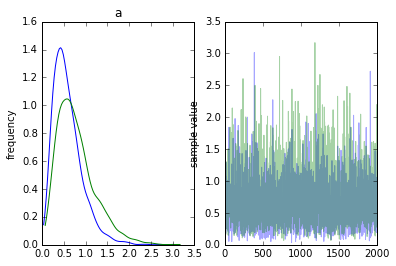

In [12]:
fit.plot('a');

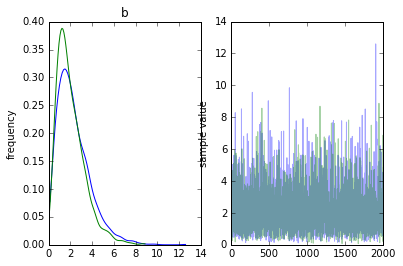

In [13]:
fit.plot('b');

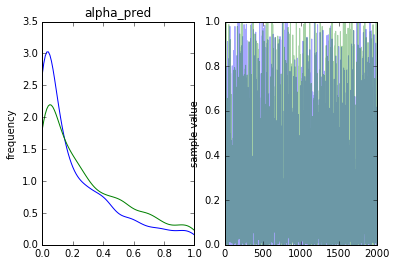

In [14]:
fit.plot('alpha_pred');

In [15]:
preds = pd.DataFrame(samples['alpha_pred'], columns=['Younger', 'Older'])
preds.to_csv('Model1_preds.csv')